# EDA dla Order and Collect Factory Storage
## MISIE2

In [2]:
import pandas as pd, numpy as np, seaborn as sns

In [3]:
df = pd.read_csv("orders factory.csv")

In [4]:
df.head()

,order,costum,collect,prod,barcode,weight,pacs
0,26968,150249.0,2018-02-22,112082CGVPS3,8614993,26.55,1
1,26968,150249.0,2018-02-22,112082CGVPS3,8614993,24.46,1
2,26951,157427.0,2018-02-20,9021,1369401,32.00,1
3,26951,157427.0,2018-02-20,12451C,8469449,24.07,1
4,26951,157427.0,2018-02-20,12451C,8469449,24.01,1


In [5]:
df.shape

(1272973, 7)

In [6]:
df.isna().sum()

order          0
costum         4
collect        0
prod           0
barcode    27239
weight         0
pacs           0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order,1272973.0,1.048179e+05,1.139374e+05,10.0,57375.00,95530.00,110755.00,3.917836e+06
costum,1272969.0,2.364867e+06,5.750972e+06,997.0,152305.00,156798.00,1500085.00,1.523901e+08
weight,1272973.0,3.962410e+01,1.389081e+02,0.1,15.72,21.93,24.65,4.945275e+04
pacs,1272973.0,2.041361e+00,6.529942e+00,1.0,1.00,1.00,1.00,6.160000e+02


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272973 entries, 0 to 1272972
Data columns (total 7 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   order    1272973 non-null  int64  
 1   costum   1272969 non-null  float64
 2   collect  1272973 non-null  object 
 3   prod     1272973 non-null  object 
 4   barcode  1245734 non-null  object 
 5   weight   1272973 non-null  float64
 6   pacs     1272973 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 68.0+ MB


Opis kolumn:
* order - numer zamówienia
* costum - numer klienta
* collect - data zamówienia
* prod - produkt (zakodowany, nie ma to znaczenia dla nas)
* barcode - numer seryjny
* weigth - waga paczki
* pacs - liczba paczek danego produktu w danym zamówieniu

Chcemy zbudować model, który grupuje informacje po produktach, w celu ich jdobrego sklasyfikowania. Zauważmy, źe costum, barcode, weigth nie będą nam potrzebne w modelu - to, że produkt jest cięźki nie ma dla nas znaczenia przujmując business case: optymalizacja położenia podobnych produktów pod wzgledem występowania w jednym zamówieniu lub dostarczanych tego samego dnia. 

In [10]:
df.collect = pd.to_datetime(df.collect)

In [11]:
groups = df.groupby(pd.Grouper(key='collect', freq='Q'))

groups

In [12]:
dfs = []
for name, group in groups:
    dfs.append(pd.DataFrame(group))
Q1df = dfs[0]
Q2df = dfs[1]
Q3df = dfs[2]
Q4df = dfs[3]

In [13]:
Q1df.head()

,order,costum,collect,prod,barcode,weight,pacs
20,25321,157106.0,2018-01-01,112082CGVPS3,8614993,21.77,1
21,25321,157106.0,2018-01-01,112082CGVPS3,8614993,11.13,1
38,25252,15200001.0,2018-01-01,331l,3796076,36.00,3
39,25252,15200001.0,2018-01-01,6001,3020541/2695387,10.31,1
40,25252,15200001.0,2018-01-01,6001,3020541/2695387,10.95,1


In [14]:
Q2df.head()

,order,costum,collect,prod,barcode,weight,pacs
1378,25389,152783.0,2018-04-01,37120,1369579,21.00,1
1379,25389,152783.0,2018-04-01,652082C,NaN,30.63,1
1380,25389,152783.0,2018-04-01,8008,3780531,10.00,1
1381,25389,152783.0,2018-04-01,9047,1369173,10.00,1
1382,25389,152783.0,2018-04-01,64162C,NaN,17.25,1


In [15]:
Q3df.head()

,order,costum,collect,prod,barcode,weight,pacs
1828,25416,152667.0,2018-07-01,50108,NaN,10.20,1
1829,25416,152667.0,2018-07-01,50108,NaN,10.25,1
1830,25416,152667.0,2018-07-01,50108,NaN,10.40,1
1831,25416,152667.0,2018-07-01,50108,NaN,10.65,1
1832,25416,152667.0,2018-07-01,50118,6220578,6.70,1


In [16]:
Q4df.head()

,order,costum,collect,prod,barcode,weight,pacs
2795,25483,152752.0,2018-10-01,331l,3796076,12.00,1
2796,25483,152752.0,2018-10-01,64162,3796861,16.55,1
2797,25483,152752.0,2018-10-01,16162S,3796946,22.68,1
2798,25483,152752.0,2018-10-01,16162S,3796946,26.08,1
2799,25483,152752.0,2018-10-01,12162CB,8614221,24.36,1


In [29]:
Q1unique = len(Q1df['prod'].unique())
Q2unique = len(Q2df['prod'].unique())
Q3unique = len(Q3df['prod'].unique())
Q4unique = len(Q4df['prod'].unique())

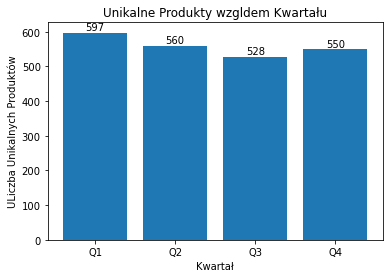

In [34]:
import matplotlib.pyplot as plt
# Define x and y values
quartals = ['Q1', 'Q2', 'Q3', 'Q4']
unique_counts = [Q1unique, Q2unique, Q3unique, Q4unique]

# Create the barplot
plt.bar(quartals, unique_counts)

# Set plot title and labels
plt.title("Unikalne Produkty wzgldem Kwartału")
plt.xlabel("Kwartał")
plt.ylabel("ULiczba Unikalnych Produktów")

# Add labels above the bars
for i, count in enumerate(unique_counts):
    plt.text(quartals[i], count + 0.5, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

In [33]:
# Calculate unique products in Q2df, Q3df, and Q4df
unique_products_q1 = set(Q1df['prod'].unique())
unique_products_q2 = set(Q2df['prod'].unique())
unique_products_q3 = set(Q3df['prod'].unique())
unique_products_q4 = set(Q4df['prod'].unique())

unique_products_q1_only = unique_products_q1 - unique_products_q2 - unique_products_q3 - unique_products_q4
unique_products_q2_only = unique_products_q2 - unique_products_q1 - unique_products_q3 - unique_products_q4
unique_products_q3_only = unique_products_q3 - unique_products_q2 - unique_products_q1 - unique_products_q4
unique_products_q4_only = unique_products_q4 - unique_products_q2 - unique_products_q3 - unique_products_q1

count_q1_only = len(unique_products_q1_only)
count_q2_only = len(unique_products_q2_only)
count_q3_only = len(unique_products_q3_only)
count_q4_only = len(unique_products_q4_only)

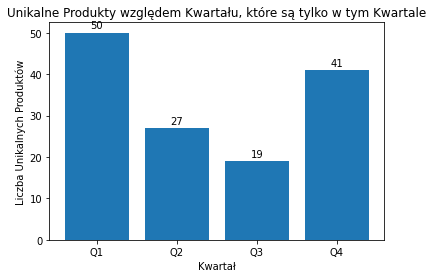

In [35]:
# Define x and y values
quartals = ['Q1', 'Q2', 'Q3', 'Q4']
unique_counts = [count_q1_only, count_q2_only, count_q3_only, count_q4_only]

# Create the barplot
plt.bar(quartals, unique_counts)

# Set plot title and labels
plt.title("Unikalne Produkty względem Kwartału, które są tylko w tym Kwartale")
plt.xlabel("Kwartał")
plt.ylabel("Liczba Unikalnych Produktów")

# Add labels above the bars
for i, count in enumerate(unique_counts):
    plt.text(quartals[i], count + 0.5, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

In [24]:
# Przykładowe statystyki poszczególnych produktów (dzienne)

daily_product_statsQ1 = Q1df.groupby(['collect', 'prod']).agg(
    daily_total_weight=('weight', 'sum'),
    daily_total_packages=('pacs', 'sum'),
    daily_total_orders=('order', 'nunique')
).reset_index()

In [26]:
# Przykładowe statystyki poszczególnych produktów (ogólne)

overall_product_statsQ1 = daily_product_statsQ1.groupby('prod').agg(
    avg_daily_weight=('daily_total_weight', 'mean'),
    avg_daily_packages=('daily_total_packages', 'mean'),
    avg_daily_orders=('daily_total_orders', 'mean')
)
overall_product_statsQ1

,avg_daily_weight,avg_daily_packages,avg_daily_orders
prod,,,
1003C,3657.750000,161.500000,1.500000
1003CRHL,558.583333,21.666667,1.166667
1003S,594.125000,25.750000,1.250000
1003SP,1116.000000,49.000000,1.000000
10162,392.073913,16.652174,1.347826
...,...,...,...
HLO451C,3851.174286,172.571429,1.000000
HLO451CR,2009.960000,90.000000,1.000000
HLO451S,9490.063750,421.500000,1.000000


In [17]:
# Przykładowo badamy kwartał Q1 ze względu na występowanie dwóch produktów w jednym zamówieniu

orders = Q1df.groupby('order')['prod'].apply(set)
co_occurrence_matrix = pd.DataFrame(index=Q1df['prod'].unique(), columns=Q1df['prod'].unique()).fillna(0)

for order_products in orders:
    for product1 in order_products:
        for product2 in order_products:
            if product1 != product2:
                co_occurrence_matrix.loc[product1, product2] += 1
co_occurrence_matrix

,112082CGVPS3,331l,6001,4005-7,11162CGVM3,122082S,132082C,17162CHL,3710,37160,...,14162ca,11162SGPV,2020,2021,19162CRF,152082S,33100M,12451CHL,13162caz,18162ca
112082CGVPS3,0,1,1,6,0,0,2,1,2,0,...,0,0,0,0,0,0,0,0,0,0
331l,1,0,3,13,1,1,3,2,7,1,...,0,0,0,0,0,0,0,0,0,0
6001,1,3,0,7,0,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
4005-7,6,13,7,0,2,2,4,1,12,1,...,0,0,0,0,0,0,0,0,0,0
11162CGVM3,0,1,0,2,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152082S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33100M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12451CHL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13162caz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
# Wprowadzenie współczynnika wspólnego występowania dwóch produktów

product_counts = Q1df.groupby('prod').count().order
product_counts = product_counts.reindex(co_occurrence_matrix.index)
scaled_matrix = co_occurrence_matrix / product_counts
np.fill_diagonal(scaled_matrix.values, 1)
scaled_matrix

,112082CGVPS3,331l,6001,4005-7,11162CGVM3,122082S,132082C,17162CHL,3710,37160,...,14162ca,11162SGPV,2020,2021,19162CRF,152082S,33100M,12451CHL,13162caz,18162ca
112082CGVPS3,1.000000,0.0125,0.002882,0.037975,0.00,0.000000,0.006154,0.004082,0.023810,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
331l,0.004255,1.0000,0.008646,0.082278,0.25,0.022727,0.009231,0.008163,0.083333,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6001,0.004255,0.0375,1.000000,0.044304,0.00,0.000000,0.000000,0.008163,0.023810,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4005-7,0.025532,0.1625,0.020173,1.000000,0.50,0.045455,0.012308,0.004082,0.142857,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11162CGVM3,0.000000,0.0125,0.000000,0.012658,1.00,0.022727,0.003077,0.004082,0.011905,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152082S,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33100M,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12451CHL,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13162caz,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [23]:
# Przykładowo badamy kwartał Q1 ze względu na występowanie dwóch produktów jednego dnia

daily_products = Q1df.groupby('collect')['prod'].apply(set)
co_occurrence_matrix_date = pd.DataFrame(index=Q1df['prod'].unique(), columns=Q1df['prod'].unique()).fillna(0)

for products_on_date in daily_products:
    for product1 in products_on_date:
        for product2 in products_on_date:
            if product1 != product2:
                co_occurrence_matrix_date.loc[product1, product2] += 1
co_occurrence_matrix_date

,112082CGVPS3,331l,6001,4005-7,11162CGVM3,122082S,132082C,17162CHL,3710,37160,...,14162ca,11162SGPV,2020,2021,19162CRF,152082S,33100M,12451CHL,13162caz,18162ca
112082CGVPS3,0,16,18,18,1,1,7,15,27,2,...,1,1,1,1,1,1,1,1,1,1
331l,16,0,16,23,2,1,10,16,19,1,...,0,0,0,0,0,0,0,0,0,0
6001,18,16,0,18,2,1,5,14,21,2,...,0,0,0,0,1,1,1,1,1,1
4005-7,18,23,18,0,2,1,6,12,18,1,...,0,0,0,0,0,0,0,0,0,0
11162CGVM3,1,2,2,2,0,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152082S,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,1
33100M,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,1
12451CHL,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,1
13162caz,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,0,1


In [22]:
product_counts_date = Q1df.groupby('prod').count().collect
product_counts_date = product_counts_date.reindex(co_occurrence_matrix_date.index)
scaled_matrix_date = co_occurrence_matrix_date / product_counts_date
np.fill_diagonal(scaled_matrix_date.values, 1)
scaled_matrix_date

,112082CGVPS3,331l,6001,4005-7,11162CGVM3,122082S,132082C,17162CHL,3710,37160,...,14162ca,11162SGPV,2020,2021,19162CRF,152082S,33100M,12451CHL,13162caz,18162ca
112082CGVPS3,1.000000,0.2000,0.051873,0.113924,0.25,0.022727,0.021538,0.061224,0.321429,1.0,...,0.5,0.166667,0.2,0.166667,1.0,1.0,1.0,0.25,0.5,1.0
331l,0.068085,1.0000,0.046110,0.145570,0.50,0.022727,0.030769,0.065306,0.226190,0.5,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
6001,0.076596,0.2000,1.000000,0.113924,0.50,0.022727,0.015385,0.057143,0.250000,1.0,...,0.0,0.000000,0.0,0.000000,1.0,1.0,1.0,0.25,0.5,1.0
4005-7,0.076596,0.2875,0.051873,1.000000,0.50,0.022727,0.018462,0.048980,0.214286,0.5,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
11162CGVM3,0.004255,0.0250,0.005764,0.012658,1.00,0.022727,0.006154,0.008163,0.011905,0.5,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152082S,0.004255,0.0000,0.002882,0.000000,0.00,0.000000,0.000000,0.000000,0.011905,0.0,...,0.0,0.000000,0.0,0.000000,0.0,1.0,1.0,0.25,0.5,1.0
33100M,0.004255,0.0000,0.002882,0.000000,0.00,0.000000,0.000000,0.000000,0.011905,0.0,...,0.0,0.000000,0.0,0.000000,0.0,1.0,1.0,0.25,0.5,1.0
12451CHL,0.004255,0.0000,0.002882,0.000000,0.00,0.000000,0.000000,0.000000,0.011905,0.0,...,0.0,0.000000,0.0,0.000000,0.0,1.0,1.0,1.00,0.5,1.0
13162caz,0.004255,0.0000,0.002882,0.000000,0.00,0.000000,0.000000,0.000000,0.011905,0.0,...,0.0,0.000000,0.0,0.000000,0.0,1.0,1.0,0.25,1.0,1.0
